# **Importing the dataset**
Dataset is imported with a pre-written code found on the web.

In [0]:
from six.moves import urllib
from sklearn.datasets import fetch_mldata

from scipy.io import loadmat
mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
mnist_path = "./mnist-original.mat"
response = urllib.request.urlopen(mnist_alternative_url)
with open(mnist_path, "wb") as f:
    content = response.read()
    f.write(content)
mnist_raw = loadmat(mnist_path)
mnist = {
    "data": mnist_raw["data"].T,
    "target": mnist_raw["label"][0],
    "COL_NAMES": ["label", "data"],
    "DESCR": "mldata.org dataset: mnist-original",
}
print("Success!")

Success!


In [0]:
m_data = mnist["data"]
m_target = mnist["target"]
print('Data shape ', m_data.shape)
print('Target shape ', m_target.shape)

Data shape  (70000, 784)
Target shape  (70000,)


# **Splitting the dataset into train, validation, and test sets**
The raw data is splitted with 6 to 1 ratio into training set and test set.
After that training set is splitted with 4 to 1 ration into training set and validation set.
Few samples from the dataset is displayed.

In [0]:
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split

#split data to training and test sets
train_img, test_img, train_lbl, test_lbl = train_test_split(m_data, m_target, test_size=1/7.0, random_state=0)

print('Test shape ', test_img.shape)
print('Train shape ', train_img.shape)
print('Test label shape ', test_lbl.shape)
print('Train label shape ', train_lbl.shape)

print(train_lbl)

Test shape  (10000, 784)
Train shape  (60000, 784)
Test label shape  (10000,)
Train label shape  (60000,)
[4. 1. 8. ... 7. 7. 8.]


In [0]:
#Split training data to train and validation sets
train_img, validation_img, train_lbl, validation_lbl = train_test_split(train_img, train_lbl, test_size=0.2, random_state=0)
print('Validation shape ', validation_img.shape)
print('Train shape ', train_img.shape)
print('Validation label shape ', validation_lbl.shape)
print('Train label shape ', train_lbl.shape)

print(validation_lbl)

Validation shape  (12000, 784)
Train shape  (48000, 784)
Validation label shape  (12000,)
Train label shape  (48000,)
[9. 6. 3. ... 2. 9. 6.]


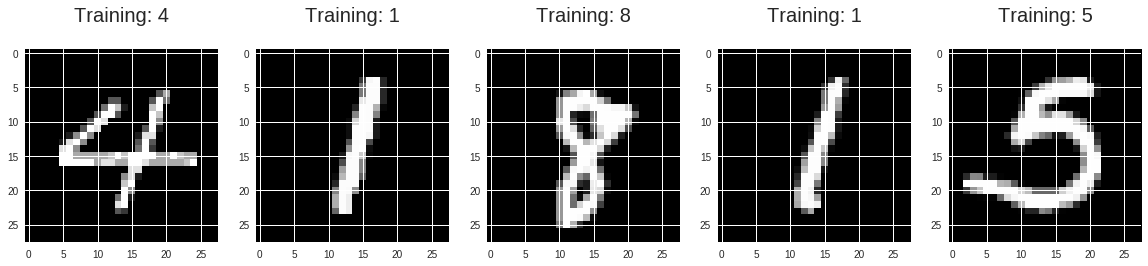

In [0]:
#display images
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

# **Decision Tree Classifier**
Decision tree with parameters min_samples_split = 10 and max_depth = 15.
The parameters are decided after a few trials.

In [0]:
# Train Decision tree classifiers
from sklearn.tree import DecisionTreeClassifier

In [0]:
dtree1 = DecisionTreeClassifier(min_samples_split=10, max_depth=15) #decision with chosen parameters
dtree1 = dtree1.fit(train_img, train_lbl) #train decision tree with training set

## **Accuracy of Validation Set.**

In [0]:
accuracy = dtree1.predict(validation_img)
print('Accuracy of Dtree1: ', accuracy_score(validation_lbl, accuracy))

Accuracy of Dtree1:  0.8733333333333333


## **Visualizing Decision Tree**
Decision tree is visualized.

In [0]:
!pip install graphviz
!pip install pydotplus

Traceback (most recent call last):
  File "<frozen importlib._bootstrap>", line 971, in _find_and_load
  File "<frozen importlib._bootstrap>", line 955, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 665, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/usr/local/lib/python3.6/dist-packages/pip/_vendor/urllib3/packages/ssl_match_hostname/__init__.py", line 9, in <module>
    from ssl import CertificateError, match_hostname
  File "/usr/lib/python3.6/ssl.py", line 164, in <module>
    import base64        # for DER-to-PEM translation
  File "<frozen importlib._bootstrap>", line 971, in _find_and_load
  File "<frozen importlib._bootstrap>", line 955, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 665, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen im

In [0]:
!apt-get install graphviz

In [0]:
from sklearn import tree
treeObj = dtree1.tree_
print ("Node count tree1:", treeObj.node_count)

Node count tree1: 3399


In [0]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

#to visualize the decision tree
dot_data = tree.export_graphviz(dtree1, out_file=None) 
graph = graphviz.Source(dot_data)
graph

## **Accuracy of test set.**

In [0]:
test_acc = dtree1.predict(test_img)
print('Accuracy of Test data: ', accuracy_score(test_lbl, test_acc))

Accuracy of Test data:  0.8703


# **k-Nearest Neighbor**
k_Nearest Neighbor classifiers with parameters = 1, 3 and 9 are used with euclidean distance.

In [0]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
model_euc3 = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
model_euc3.fit(train_img, train_lbl)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [0]:
y_eucpred3 = model_euc3.predict(test_img)
print('Accuracy of k = 1: ', accuracy_score(test_lbl, y_eucpred3))

Accuracy of k = 1:  0.9727


In [0]:
model_euc1 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
model_euc1.fit(train_img, train_lbl)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [0]:
y_eucpred1 = model_euc1.predict(test_img)
print('Accuracy of k = 3: ', accuracy_score(test_lbl, y_eucpred1))

Accuracy of k = 3:  0.9722


In [0]:
model_euc2 = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
model_euc2.fit(train_img, train_lbl)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [0]:
y_eucpred2 = model_euc2.predict(test_img)

In [0]:
print('Accuracy of k = 9: ', accuracy_score(test_lbl, y_eucpred2))

Accuracy of k = 9:  0.968


# **Gaussian Naive Bayes**

In [0]:
from sklearn.naive_bayes import GaussianNB

gaussianNB = GaussianNB()
gaussianNB.fit(train_img, train_lbl)

predicted = gaussianNB.predict(validation_img)
print (predicted)

print('Accuracy of Gaussian Naive Bayes: ', accuracy_score(validation_lbl, predicted))

test_acc = gaussianNB.predict(test_img)
print('Accuracy of Test Data with Gaussian Naive Bayes: ', accuracy_score(test_lbl, test_acc))


[9. 6. 9. ... 2. 9. 6.]
Accuracy of Gaussian Naive Bayes:  0.5505
Accuracy of Test Data with Gaussian Naive Bayes:  0.5509


In [0]:
idx_zero = train_lbl==0  # class 0
idx_three = train_lbl==3  # class 3
X_zero = train_img[idx_zero]
X_three = train_img[idx_three]
Y_zero = train_lbl[idx_zero]
Y_three = train_lbl[idx_three]

In [0]:
print("Class zero shape: " , X_zero.shape)
print ("Class three shape: ", X_three.shape)

Class zero shape:  (4781, 784)
Class three shape:  (4856, 784)


In [0]:
range_zero = X_zero.shape[0]
range_three = X_three.shape[0]
sum_zero = 0
sum_three = 0

for image in X_zero:
  sum_zero += image[407]

mean_zero = sum_zero/range_zero
print("Mean of class-0:", mean_zero)

for image in X_three:
  sum_three += image[407]
  
mean_three = sum_three/range_three
print("Mean of class-3:", mean_three)

Mean of class-0: 3.8724116293662414
Mean of class-3: 156.8023064250412


In [0]:
variance_zero = 0
sqr_diff_zero = 0

for image_zero in X_zero:
  sqr_diff_zero += pow(image_zero[407]-mean_zero, 2)
  
variance_zero = sqr_diff_zero/range_zero
print("Variance of class-0: ", variance_zero)

variance_three = 0
sqr_diff_three = 0

for image_three in X_three:
  sqr_diff_three += pow(image_three[407]-mean_three, 2)
  
variance_three = sqr_diff_three/range_three
print("Variance of class-3: ", variance_three)

Variance of class-0:  676.2828218141824
Variance of class-3:  11023.982745915899


# **Gaussian Bayes Multivariate**

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(train_img, train_lbl)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [0]:
lda_pred = lda.predict(validation_img)
print('Accuracy of Multivariate Gaussian Bayes using shared covariance matrix (LDA) on validation set: ', accuracy_score(validation_lbl, lda_pred))

Accuracy of Multivariate Gaussian Bayes using shared covariance matrix (LDA) on validation set:  0.8598333333333333


In [0]:
lda_pred_test = lda.predict(test_img)
print('Accuracy of Multivariate Gaussian Bayes using shared covariance matrix (LDA) on test set: ', accuracy_score(test_lbl, lda_pred_test))

Accuracy of Multivariate Gaussian Bayes using shared covariance matrix (LDA) on test set:  0.8695


In [0]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(train_img, train_lbl)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [0]:
qda_pred = qda.predict(validation_img)
print('Accuracy of Multivariate Gaussian Bayes using general covariance matrix (QDA)  on validation set: ', accuracy_score(validation_lbl, qda_pred))

Accuracy of Multivariate Gaussian Bayes using general covariance matrix (QDA)  on validation set:  0.5339166666666667


In [0]:
qda_pred_test = qda.predict(test_img)
print('Accuracy of Multivariate Gaussian Bayes using general covariance matrix (QDA)  on test set: ', accuracy_score(test_lbl, qda_pred_test))

Accuracy of Multivariate Gaussian Bayes using general covariance matrix (QDA)  on test set:  0.537


# **Summary**

We evaluated the performance of decision tree, k-NN and Bayes classifiers (Gaussian Naïve Bayes and Gaussian Bayes with general and shared covariance matrices) on the MNIST dataset.

We have obtained the best results with the kNN classifier using k=1, giving an accuracy of 97% on test data.

* The performance of decision tree was 87% on the test set.
* The performance of kNN classifier was great with accuracy of 97% with k=1 on the test set, but the running time was extremely slow.
* The performance of Gaussian Naive Bayes was 55% on the test set.
* The performance of Linear Discriminant Analysis was 86% on the test set.

The second best classifier was decision tree with 87% accuracy on the test set. 

Even though kNN performed the best, the running time gives it a disadvantage compared to other classifiers.

